## Problem Statement

Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.
Perform a detailed exploratory data analysis and visualization on the `netflix_titles.csv` data to understand more about movies.

I'll start by loading the dataset and performing some initial exploratory data analysis (EDA) to understand its structure and content. After that, I'll create visualizations to better understand the data, focusing on aspects such as the distribution of movies, genres, release years, and more.

Let's begin by loading the dataset and examining its basic structure.

## Loading the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

# Display basic information about the dataset
netflix_data_info = netflix_data.info()
netflix_data_head = netflix_data.head()

netflix_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [2]:
netflix_data_head

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


The dataset contains 6,234 entries with 12 columns. Here's a brief overview of the columns:

- **show_id:** Unique identifier for each show/movie.
- **type:** Indicates whether the entry is a "Movie" or a "TV Show".
- **title:** The title of the movie or TV show.
- **director:** The director(s) of the movie or TV show.
- **cast:** The main cast of the movie or TV show.
- **country:** The country where the movie or TV show was produced.
- **date_added:** The date the movie or TV show was added to Netflix.
- **release_year:** The release year of the movie or TV show.
- **rating:** The age rating of the movie or TV show.
- **duration:** The duration of the movie (in minutes) or the number of seasons (for TV shows).
- **listed_in:** The genres or categories the movie or TV show is listed under.
- **description:** A brief description of the movie or TV show.

Some columns, **like director, cast, country, and rating,** have **missing values** but that will not be the focus of this analysis.

I'll focus on analyzing the movies in the dataset by filtering out the "Movie" entries and then performing visualizations to explore the following aspects:

1. Distribution of movies over the years.
2. Popular genres/categories.
3. Distribution of movie durations.
4. Analysis of countries producing movies.
5. Most common movie ratings.

Let's proceed with the analysis.

## Visualizations

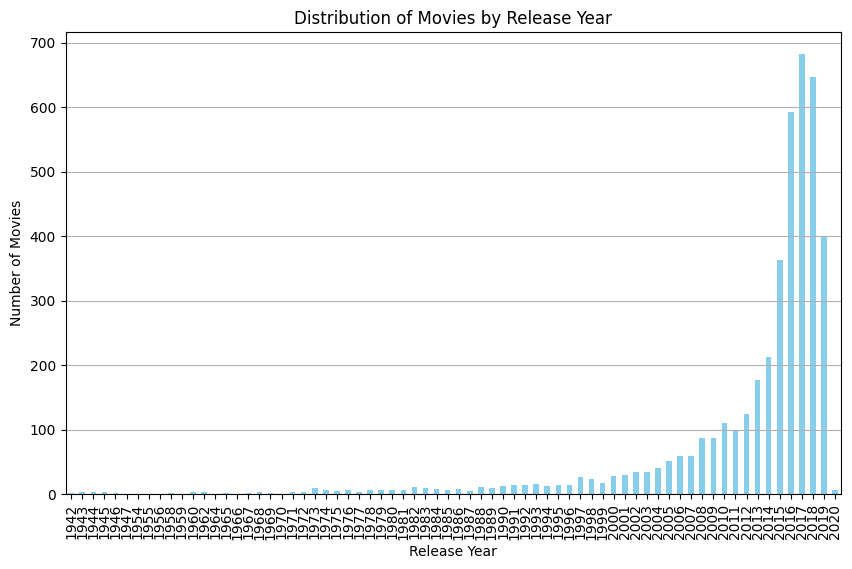

In [3]:
import matplotlib.pyplot as plt

# To suppress output warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Filter the dataset for movies only
movies_data = netflix_data[netflix_data['type'] == 'Movie']

# Convert the 'date_added' column to datetime format
movies_data['date_added'] = pd.to_datetime(movies_data['date_added'])

# Plot 1: Distribution of movies by release year
plt.figure(figsize=(10, 6))
movies_data['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()


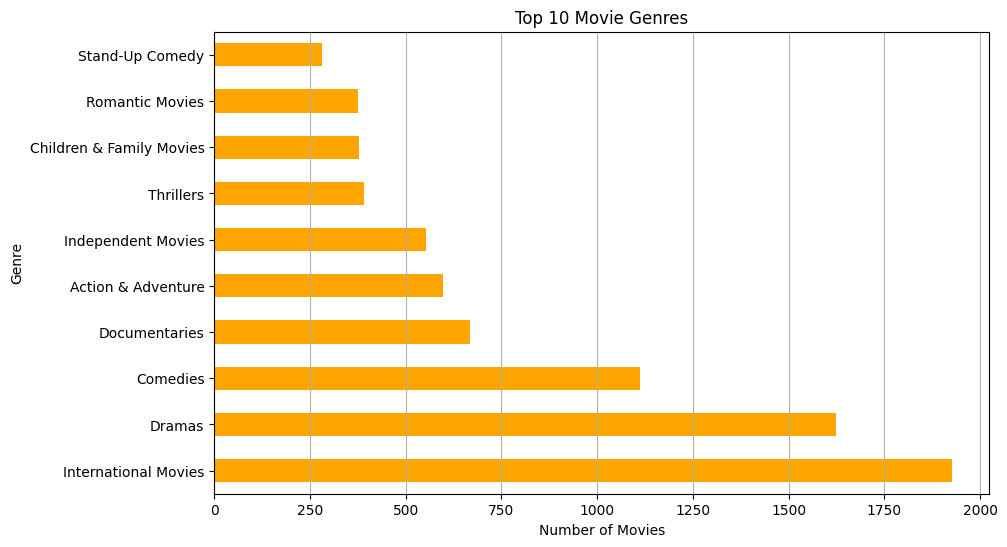

In [4]:
# Plot 2: Most popular genres/categories
plt.figure(figsize=(10, 6))
movies_data['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.show()


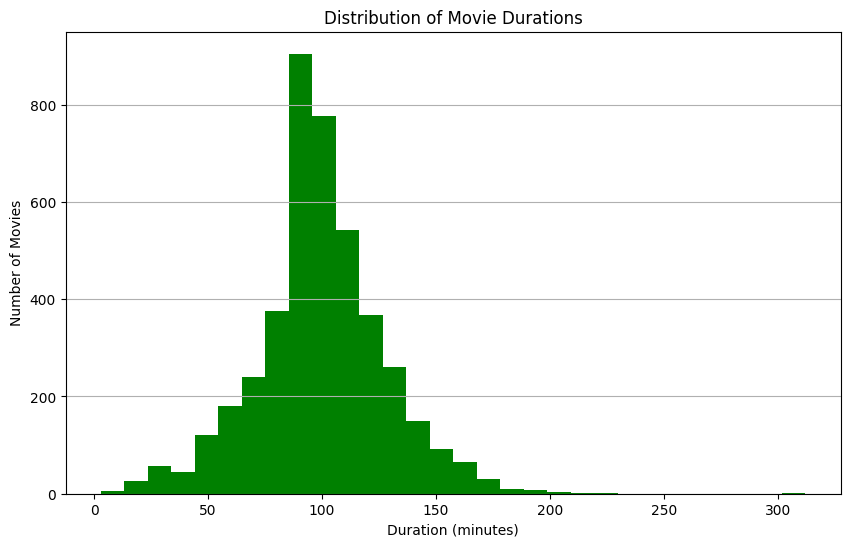

In [5]:
# Plot 3: Distribution of movie durations
plt.figure(figsize=(10, 6))
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(int)
movies_data['duration'].plot(kind='hist', bins=30, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()


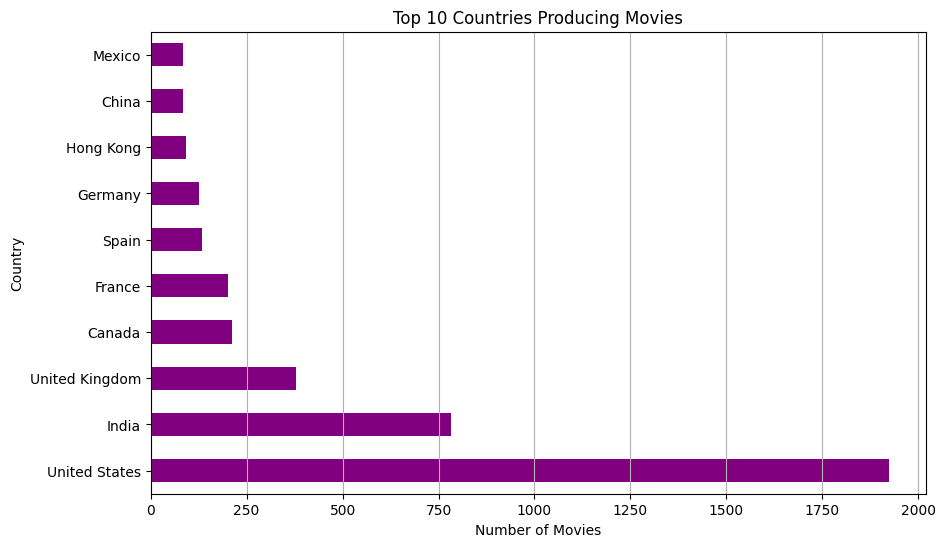

In [6]:
# Plot 4: Top countries producing movies
plt.figure(figsize=(10, 6))
movies_data['country'].str.split(', ').explode().value_counts().head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Countries Producing Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()


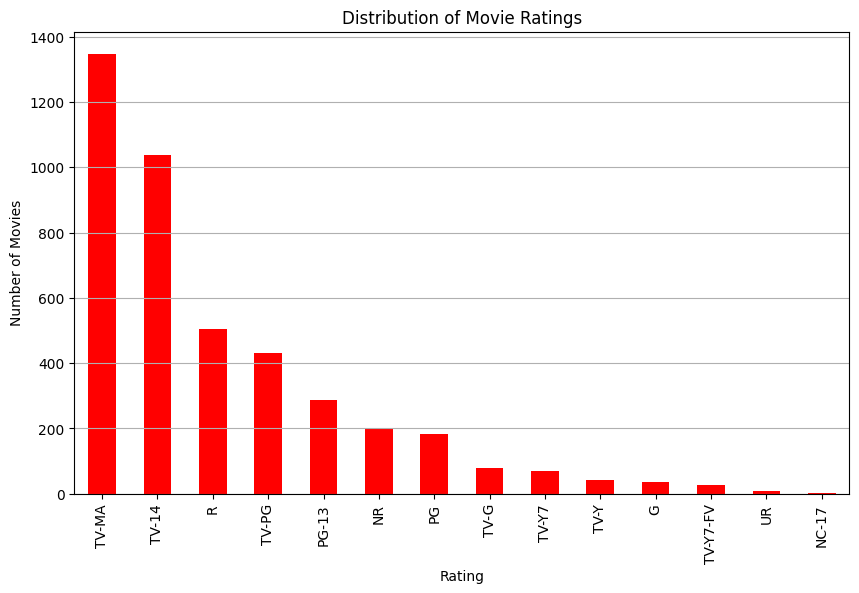

In [7]:
# Plot 5: Most common movie ratings
plt.figure(figsize=(10, 6))
movies_data['rating'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

Here is the exploratory data analysis (EDA) and visualization for the Netflix movies dataset:

1. **Distribution of Movies by Release Year:**

The bar chart shows the number of movies released each year. There is a noticeable increase in movie releases in recent years, peaking around 2017-2019.

2. **Top 10 Movie Genres:**

The horizontal bar chart highlights the most popular genres on Netflix. "Dramas," "Comedies," and "Documentaries" are among the most common genres.

3. **Distribution of Movie Durations:**

The histogram displays the distribution of movie durations. Most movies have a duration between 80 and 120 minutes, with a few outliers on either side.

4. **Top 10 Countries Producing Movies:**

The bar chart shows the top countries producing movies available on Netflix. The United States dominates, followed by India, the United Kingdom, and Canada.

5. **Distribution of Movie Ratings:**

The bar chart presents the distribution of movie ratings. The most common ratings include "TV-MA," "TV-14," and "TV-PG," which correspond to different audience age groups.

These visualizations provide insights into the types of movies available on Netflix, their durations, origins, and how they are categorized by genre and rating.